<a href="https://colab.research.google.com/github/panos42/KMeans_from_Scratch/blob/main/KMeans_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# The purpose of this, is to learn how to implement a simple k-means clustering algorithm on some generated data + a dataset from Kaggle
# The KMeans algorithm seeks to segment a dataset into groups based on the similarity of datapoints.uplo

In [72]:
# Algorithm
# 1. Randomly select some datapoints as the centroids
# 2. Then calculate the distances between every data point to the centroids
# 3. Assign each datapoint to the centroid with the smallest distance

# 4. Find the Mean Value and recluster with the means as the new centroids for each set.
# 5. If the mean is the same with the old centroid then you have found it!

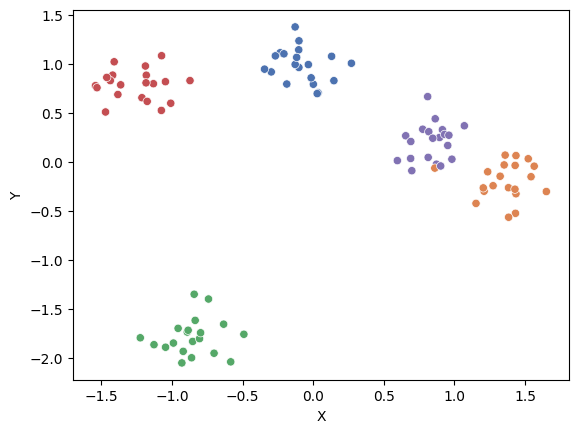

In [73]:
# Creating some random datapoints

import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import random as rand

centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

sns.scatterplot(x=[X[0] for X in X_train], y = [X[1] for X in X_train], hue = true_labels, palette="deep", legend = None)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [74]:
import numpy as np
from sklearn.metrics import silhouette_score


# For graphs in 2 axis we need to use the Euclidean Distance to find the distance between a point
# and a dataset of points, so lets define some functions for this

def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))


class KMeans:

    # setting up the initial configuration of the object. it takes two arguments
    # n_clusters=8 and max_iter = 300
    # self.n_clusters = n.clusters : this line stores the value of n_clusters as an instance variable of the object
    # similarly the second one does the same.
    # this way they can be used when the algorithm is running
    def __init__(self, n_clusters = 8, max_iter = 300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Step 1 : Randomly select centroid start points, uniformly distributed across the domain of the dataset
        min_,max_ = np.min(X_train, axis=0) , np.max(X_train, axis=0) # returns the min and max
        #self.centroids = [np.random.uniform(min_,max_) for _ in range (self.n_clusters)]

        centroids = []
        for _ in range(self.n_clusters):
          random_centroid = np.random.uniform(min_,max_)
          centroids.append(random_centroid)

        self.centroids = centroids

        iteration = 0
        prev_centroids = None

        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
          # First we sort each data points, assigning to nearest centroid

          # initialize the list
          # it would be like this : [[point1,point3], [point2,point4]] ... point1 and point3 are assigned to the first cluster
          sorted_points = [[] for _ in range(self.n_clusters)]

          # run a loop for each point
          for x in X_train:
            distances = euclidean(x, self.centroids) # measure the distance
            cendroid_idx = np.argmin(distances) # Returns the indices of the minimum values along an axis.
            sorted_points[cendroid_idx].append(x) # the datapoint gets assigned to the appropriate centroid


          # Now the points are assigned.
          # cur_centroid must become prev_centroid

          prev_centroids = self.centroids

          # new centroids are the mean of the previous
          # [[x1,y1], [x3,y4], [x5,y6]]
          # ex: point1 = [1,2] point2 = [2,3] point3 = [3,4]
          # mean for the first dimension (x values) = (1+2+3)/3 = 2
          # mean for the second dimension (y values) = (2+3+4)/3 = 3
          # so the result is = [2,3]
          # same for the rest of the clusters
          self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]

          for i, centroid in enumerate(self.centroids):
              if np.isnan(centroid).any(): # catch any nans, resulting from a centroid without points
                self.centroids[i] = prev_centroids[i]
          iteration += 1


    def evaluate(self, X):
        centroids = []
        centroid_idxs = []  # This will store the cluster index for each point
        for x in X:
            distances = euclidean(x, self.centroids)  # Find distance to each centroid
            centroid_idx = np.argmin(distances)  # Index of the closest centroid
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)  # Store the index of the closest centroid
        return centroids, centroid_idxs  # Return the correct list of indices


    # New method: Compute silhouette score to evaluate clustering performance
    def score(self, X):
        _, centroid_idxs = self.evaluate(X)  # Get cluster indices for each point
        # Calculate and return the silhouette score
        return silhouette_score(X, centroid_idxs)



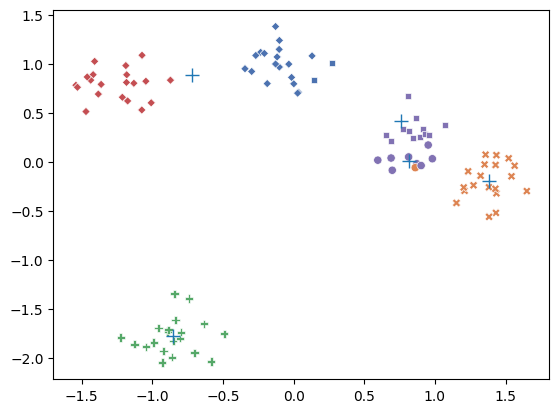

In [75]:
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.show()

# **Next Experiment** is trying to use a real database to achieve similar results

A reminder : **Clustering**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, **the aim is to segregate groups with similar traits and assign them into clusters.**

In [76]:
# TODO : https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data


# For this learning experiment I chose the Mall_Customers.csv , a kaggle dataset that can be found here "https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python"

In [77]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import random as rand


import pandas as pd

data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
# We will use 2 features for this : Spending Score & Annual Income

x = data[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [79]:
# Kmeans Init
kmeans = KMeans(n_clusters= 5, max_iter=300)

# Fit the model to our new dataset
kmeans.fit(x)

# Get the centroids and their corresponding data points
centroids, centroid_idx = kmeans.evaluate(x)

# Print out the centroids
print("Cluster centroids:")
print(kmeans.centroids)




Cluster centroids:
[array([86.53846154, 82.12820513]), array([48.07070707, 56.64646465]), array([78.48275862, 18.20689655]), array([26.30434783, 20.91304348]), array([109.7,  22. ])]


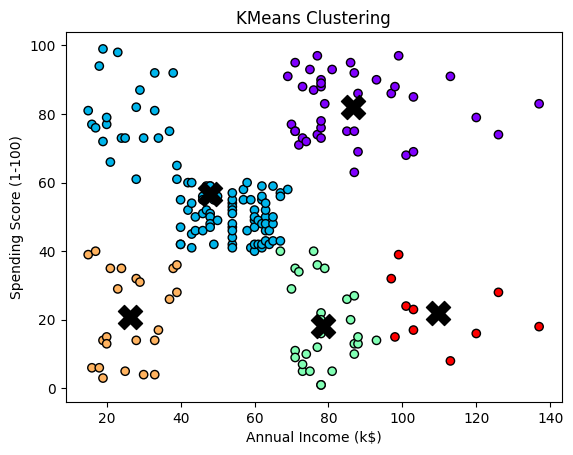

In [80]:
import matplotlib.pyplot as plt

# Plot the data points and their centroids
plt.scatter(x[:, 0], x[:, 1], c=centroid_idx, cmap='rainbow', marker='o', edgecolor='k')
plt.scatter(np.array(kmeans.centroids)[:, 0], np.array(kmeans.centroids)[:, 1], s=300, c='black', marker='X')  # Centroids
plt.title("KMeans Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


Now lets use the Silhouette Score to check our algorithms accuracy


In [81]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select features (e.g., Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply KMeans
kmeans = KMeans(n_clusters=5, max_iter=300)
kmeans.fit(X)

# Evaluate the clustering
centroids, centroid_idxs = kmeans.evaluate(X)

# Get the silhouette score
silhouette = kmeans.score(X)
print(f'Silhouette Score: {silhouette}')


Silhouette Score: 0.4637342932748911
